The purpose of this tutorial is to take you through the data science pipeline, from data collection to machine learning. We will be working with country data, including information about the population, GDP, and more.

We will be using the dataset found here: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data

Data Collection

In [2]:
import pandas as pd

df = pd.read_csv('data.csv')
df

C:\Users\danyl\AppData\Local\Temp\ipykernel_22384\384485691.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


Data Cleaning

In [3]:
df = df.rename(columns={
    'child_mort': 'child mortality', 'health': 'health spending', 'inflation': 'gdp growth', 'life_expec': 'life expectancy', 'total_fer': 'fertility', 'gdpp': 'gdp per capita'})
df.dropna(inplace=True)
df

,country,child mortality,exports,health spending,imports,income,gdp growth,life expectancy,fertility,gdp per capita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


Data Visualization

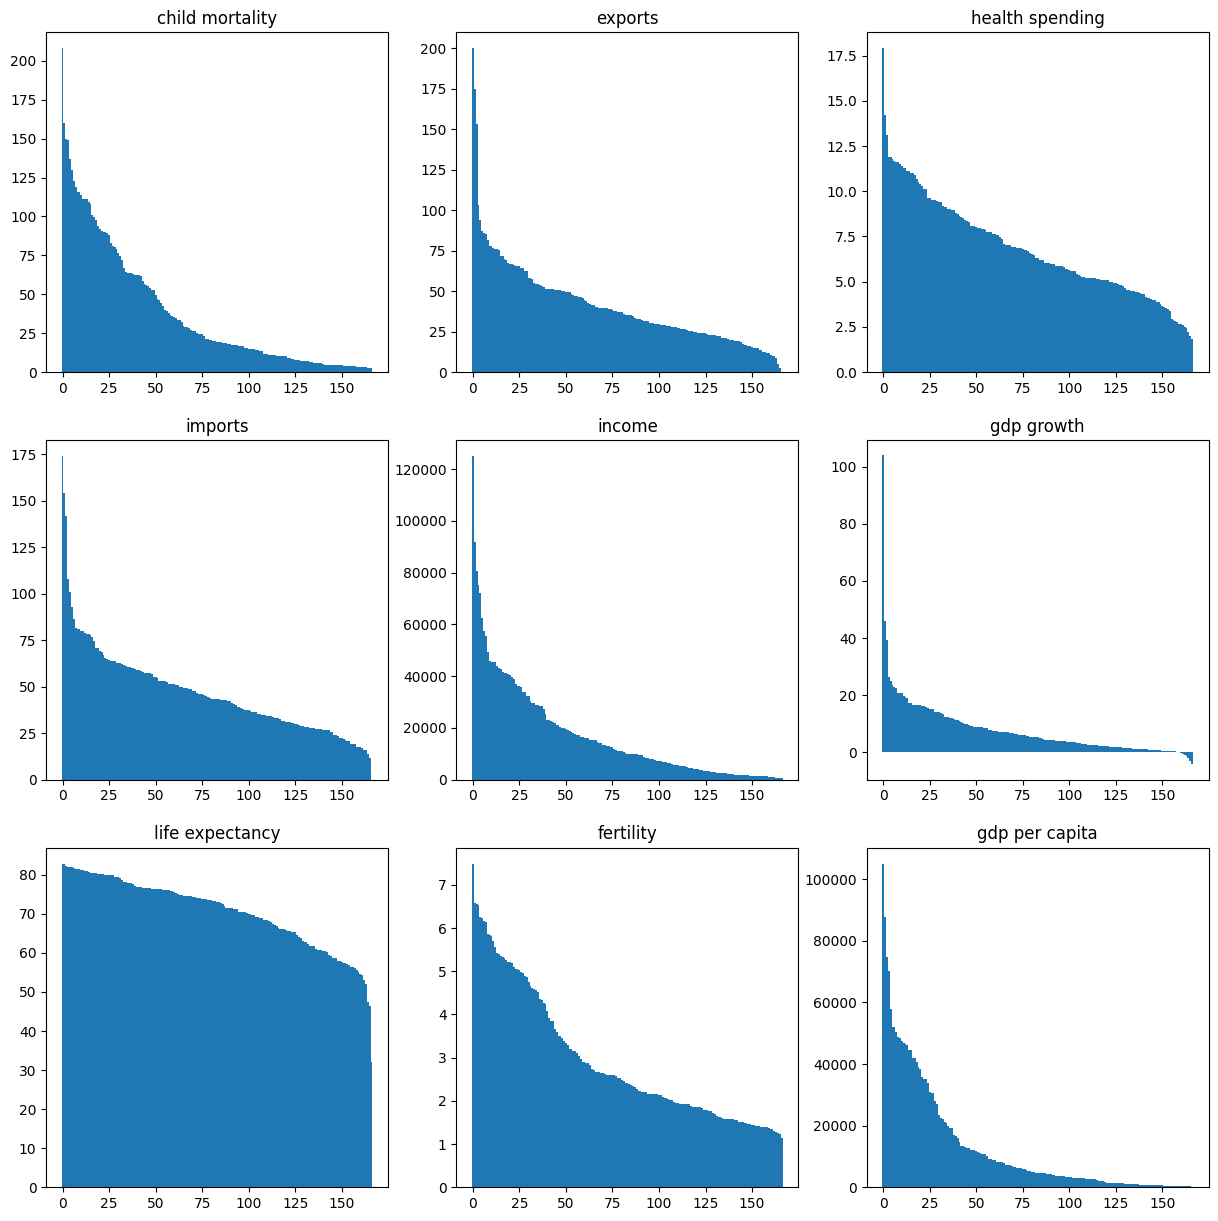

In [4]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(3, 3, figsize=(15,15))
loc = [ax[0][0], ax[0][1], ax[0][2], ax[1][0], ax[1][1], ax[1][2], ax[2][0], ax[2][1], ax[2][2]]
units = ['deaths under 5 per 1000 live births', '% of GDP', '% of GDP', '% of GDP', '% of GDP', 'per person', 'annual', 'years of life for a newborn given current mortality patterns', 'births ']

for i, col in enumerate(df.drop(columns='country', inplace=False).columns):
  plt.sca(loc[i])
  plt.bar(df.index, df[col].sort_values(ascending=False), width=1)
  
  plt.title(col)